In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing training data
df = pd.read_csv('Google_Stock_Price_Train.csv')

In [3]:
df.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [4]:
train = df.iloc[:, 1:2].values

In [5]:
train

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [6]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
train_sc = sc.fit_transform(train)

In [7]:
train_sc

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [8]:
train_sc.shape

(1258, 1)

Creating a data structure with 60 timesteps and 1 output

In [9]:
# 60 stock price before the ith one would be considered to predict the ith stock price
# Experimentally 60 is a good number, in another problem you need to 
# check it it may be larger or smaller

In [10]:
x_train = []
y_train = []
for i in range(60, len(train_sc)):
    x_train.append(train_sc[i - 60: i, 0])
    y_train.append(train_sc[i, 0])

x_train = np.array(x_train)
y_train = np.array(y_train)
print(x_train.shape)

# Reshaping
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
print(x_train.shape)

(1198, 60)
(1198, 60, 1)


In [11]:
# Part 2 - Building the RNN
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

Using TensorFlow backend.
C:\Users\u0125384\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\u0125384\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\u0125384\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\u0125384\Anaconda3\lib\site-packages\tensorflow\python\framewo

In [12]:
# Inisialising RNN
regressor = Sequential()
# Adding the 1st LSTM and dropout regularisation layer
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding the d LSTM and some dropout regularisation layer 
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding the 3rd LSTM and some dropout regularisation layer 
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding the 4th LSTM and some dropout regularisation layer 
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

Instructions for updating:
Colocations handled automatically by placer.


In [13]:
# Fitting the RNN to training set
regressor.fit(x_train, y_train, epochs = 100, batch_size = 32)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0397
Epoch 2/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0062
Epoch 3/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0053
Epoch 4/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0059
Epoch 5/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0051
Epoch 6/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0052
Epoch 7/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0044
Epoch 8/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0053
Epoch 9/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0046
Epoch 10/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0041
Epoch 11/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0037
Epoch 12/100
1198/1198 [==

1198/1198 [==============================] - 4s 3ms/step - loss: 0.0016
Epoch 95/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0016
Epoch 96/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0016
Epoch 97/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0016
Epoch 98/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0015
Epoch 99/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0015
Epoch 100/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0015


In [14]:
# Making the prediction and visualising the results
# Real stock price from 2017
test_dataset = pd.read_csv('Google_Stock_Price_Test.csv')
test = test_dataset.iloc[:, 1:2].values
test.shape

(20, 1)

In [15]:
dataset_total = pd.concat((df['Open'], test_dataset['Open']), axis = 0)
print(dataset_total.shape)
inputs = dataset_total[len(dataset_total) - len(test_dataset) - 60:].values
print(inputs.shape)
inputs = inputs.reshape(-1, 1)
print(inputs.shape)
inputs = sc.transform(inputs) # yoy shouldn't fit and transform test data so we only apply transform 

(1278,)
(80,)
(80, 1)


In [16]:
x_test = []
for i in range(60, 80):
    x_test.append(inputs[i-60: i, 0])
    
x_test = np.array(x_test)
print(x_test.shape)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

(20, 60)


In [17]:
predicted_stock_price = regressor.predict(x_test)
print('Before inverse transformation', predicted_stock_price)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
print('After inverse transformation' , predicted_stock_price)

Before inverse transformation [[0.9153993 ]
 [0.9106144 ]
 [0.91041404]
 [0.9124824 ]
 [0.91804284]
 [0.9281016 ]
 [0.9378641 ]
 [0.94246924]
 [0.9433964 ]
 [0.94276583]
 [0.9418691 ]
 [0.941001  ]
 [0.9404503 ]
 [0.94126195]
 [0.94304234]
 [0.9508686 ]
 [0.96299547]
 [0.9763917 ]
 [0.9843582 ]
 [0.97843444]]
After inverse transformation [[771.202  ]
 [768.6298 ]
 [768.52216]
 [769.63403]
 [772.6231 ]
 [778.0303 ]
 [783.27826]
 [785.7537 ]
 [786.2522 ]
 [785.91315]
 [785.43115]
 [784.9645 ]
 [784.66846]
 [785.1048 ]
 [786.0618 ]
 [790.2689 ]
 [796.78784]
 [803.9891 ]
 [808.27155]
 [805.0872 ]]


<IPython.core.display.Javascript object>


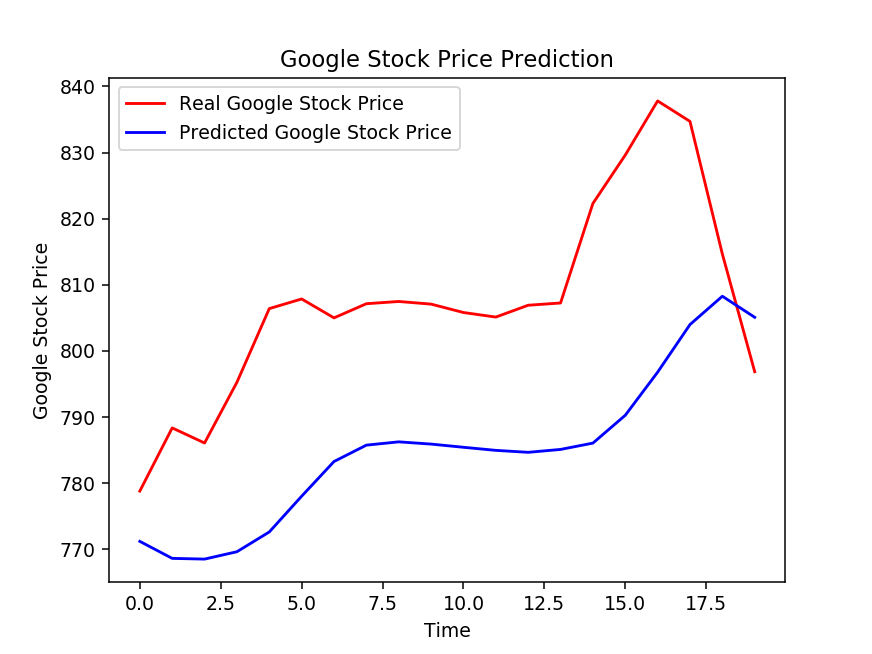

In [18]:
%matplotlib notebook
# Visualising the results
plt.plot(test, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()